In [1]:
# This notebook has to be in tudataset/tud_benchmark

# This means that you have to first download the TUDataset Repository e.g. with
# git clone https://github.com/chrsmrrs/tudataset.git

# Exploratory Data Analysis - Getting started

We assume that you have the generated Gram matrices and sparse vectors in the directories

> kernels/node_labels

> kernels/without_labels

If not you can download them [here](https://ucloud.univie.ac.at/index.php/s/E3YKph0jkpbw8TN).

The generated Gram matrices and sparse vectors *kernels/node_labels* use the node labels during the construction of the kernels[1] while the ones in *kernels/without_labels* use no node labels and are completely relying on the topology. 

Below we show how you can use the Gram matrices and sparse vectors that we provided to get started with your exploratory data analysis.





[1]: Except for the IMBD-Binary data set, which only has a representation without using the node labels.


In [2]:
# #Install pytorch geometric: https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html

# #Here is the gpu cuda installation, for the cpu version replace cu102 with cpu
# ! pip install torch-scatter==latest+cu102 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
# ! pip install torch-sparse==latest+cu102 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
# ! pip install torch-cluster==latest+cu102 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
# ! pip install torch-spline-conv==latest+cu102 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
# ! pip install torch-geometric

In [11]:
import os
import numpy as np
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import pandas as pd
from sklearn.decomposition import KernelPCA, TruncatedSVD
from matplotlib import pyplot as plt
from nrkmeans import NrKmeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
from scipy.sparse import load_npz
import auxiliarymethods.auxiliary_methods as aux
import networkx as nx
from sklearn.cluster import KMeans
from copy import deepcopy

In [2]:
# utility functions
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

def load_sparse(path):
    return load_npz(path)

def select_from_list(l, indices):
    return [l[i] for i in indices]

## Overview of NMI performance for different representations

### KPCA
Applied [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) with the provided Gram matrix and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.


### SVD
Applied [Truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) a version of SVD that can handle sparse feature matrices and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.

### Spectral Clustering
Applied [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), an algorithm that is often used to cluster graph data, with the similarities provided by the Gram matrices and with $k=$'number of ground truth classes'. In contrast to Subkmeans Spectral Clustering can find arbitrarily shaped clusters.

#################node_labels#################


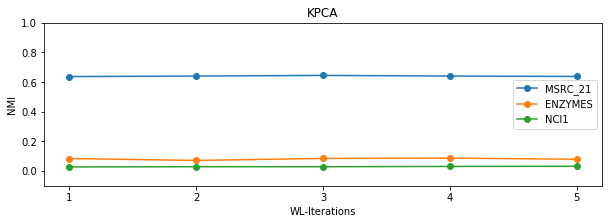

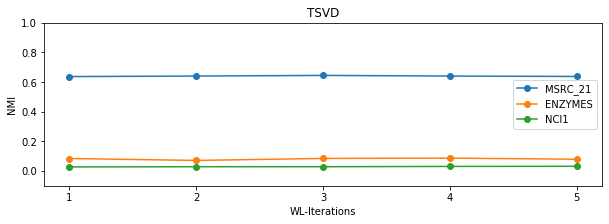

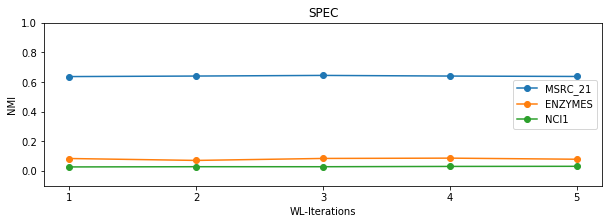

#################without_labels#################


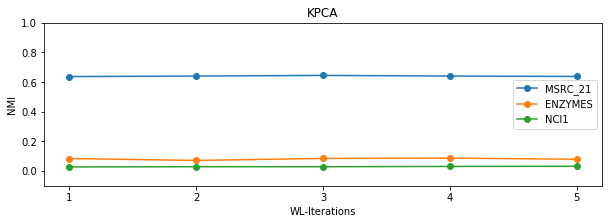

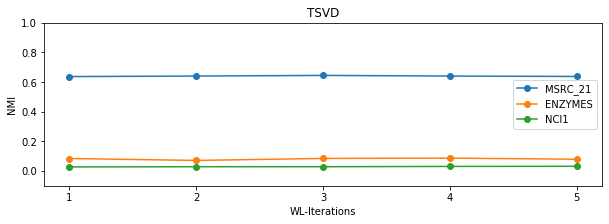

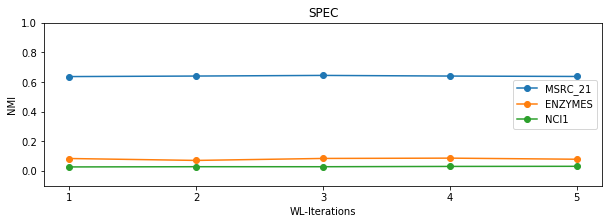

In [9]:
result_names = ["KPCA", "TSVD", "SPEC"]
for version in ["node_labels", "without_labels"]:
    print(f"#################{version}#################")
    for name_i in result_names:
        path_i = os.path.join('graph_representations', 'node_labels', 'KPCA.csv')
        nmi_df = pd.read_csv(path_i, index_col=0)
        fig, ax = plt.subplots(figsize=(10,3))
        ax.set_ylabel("NMI")
        ax.set_xlabel("WL-Iterations")
        ax.set_ylim([-0.1,1])
        ax.set_xticks([0,1,2,3,4])
        ax.set_xticklabels([1,2,3,4,5])
        ax.set_title(name_i)
        nmi_df.plot(marker="o", ax=ax)
        plt.show();

## Example usage for gram matrix and sparse matrix with Weisfeiler-Lehman kernel

For the other kernels this works the same.

Load from  kernels/node_labels
##################################
Dataset  ENZYMES
Iteration  1
##################################
(600, 600) (600, 9658)
n_clusters:  6
TSVD


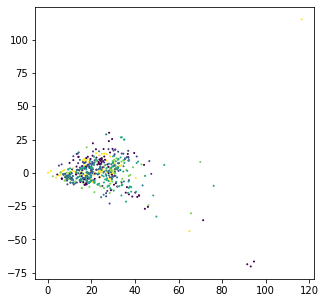

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0535


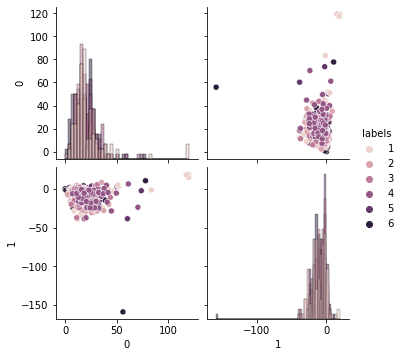

KPCA


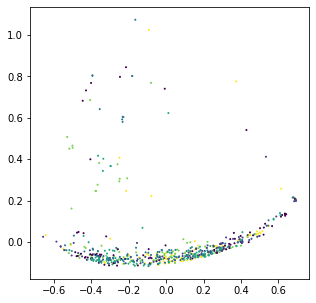

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0840


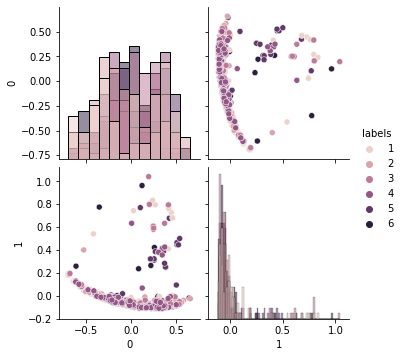

Spectral  NMI:0.0500
##################################
##################################
Dataset  ENZYMES
Iteration  2
##################################
(600, 600) (600, 25577)
n_clusters:  6
TSVD


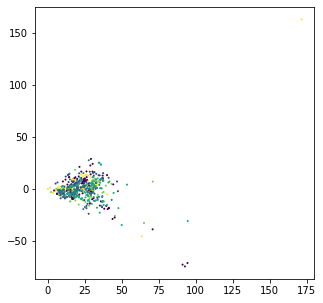

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0524


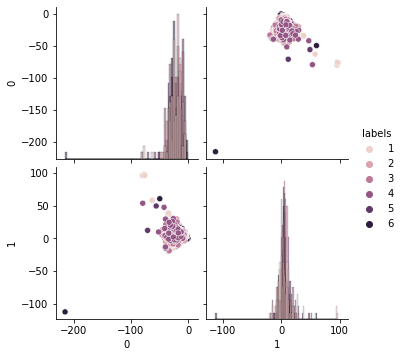

KPCA


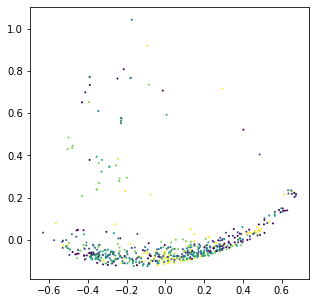

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0836


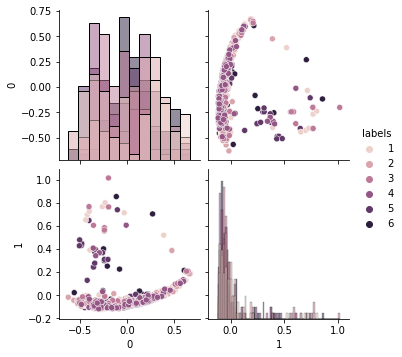

Spectral  NMI:0.0569
##################################
##################################
Dataset  ENZYMES
Iteration  3
##################################
(600, 600) (600, 42457)
n_clusters:  6
TSVD


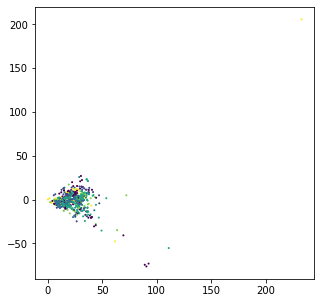

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0519


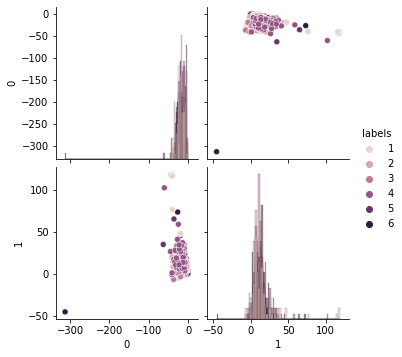

KPCA


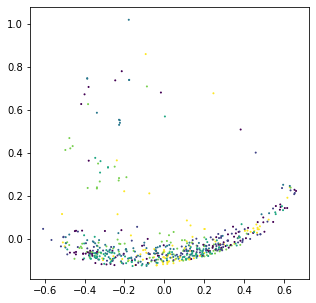

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0845


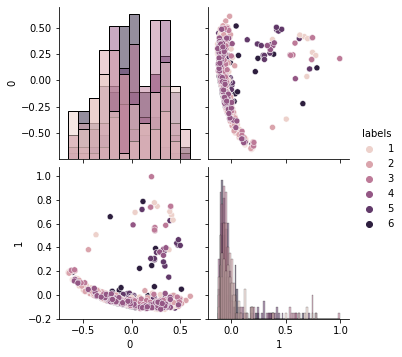

Spectral  NMI:0.0497
##################################
##################################
Dataset  ENZYMES
Iteration  4
##################################
(600, 600) (600, 59599)
n_clusters:  6
TSVD


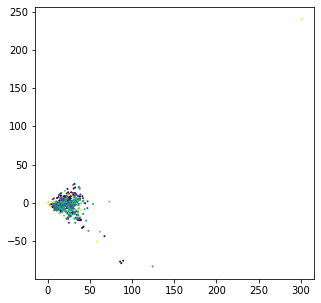

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0489


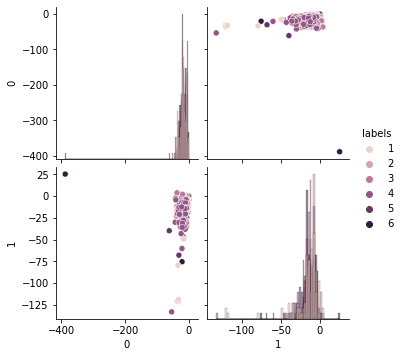

KPCA


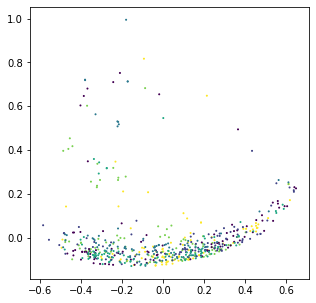

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0688


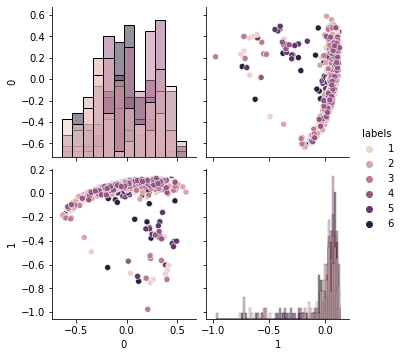

Spectral  NMI:0.0438
##################################
##################################
Dataset  ENZYMES
Iteration  5
##################################
(600, 600) (600, 76881)
n_clusters:  6
TSVD


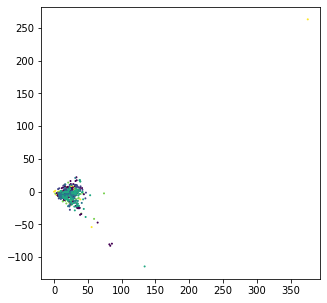

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0557


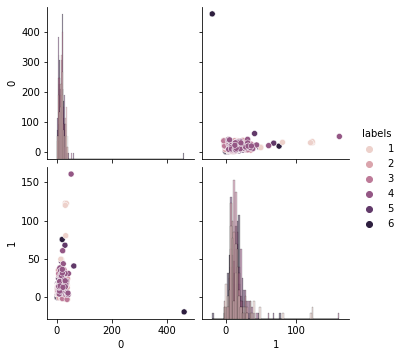

KPCA


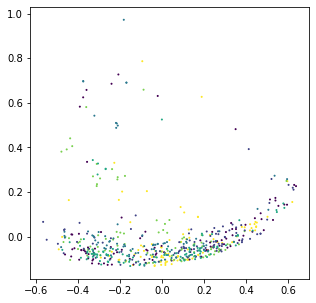

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0678


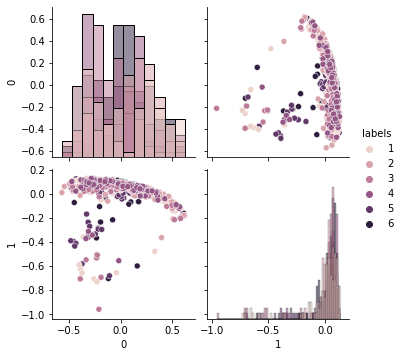

Spectral  NMI:0.0462
##################################
Load from  kernels/without_labels
##################################
Dataset  ENZYMES
Iteration  1
##################################


OSError: kernels/without_labels/ENZYMES_gram_matrix_wl1.csv not found.

In [14]:
# # This code was used to get the results for each data set above:
# # Get some initial results for each data set
# # This will plot all representations and cluster these with Spectral Clustering and Subkmeans
# # In your case you might only want to run your data set

use_edge_labels = False
for use_labels in [True, False]:
    if use_labels:
        base_path = os.path.join("kernels","node_labels")
        datasets = ["ENZYMES"]
    else:
        base_path = os.path.join("kernels","without_labels")
        datasets = ["ENZYMES"]
    print("Load from ", base_path)
    nmis_kpca = {}
    nmis_tsvd = {}
    nmis_spec = {}

    for dataset in datasets:
        classes = dp.get_dataset(dataset)
        nmis_kpca[dataset] = []
        nmis_tsvd[dataset] = []
        nmis_spec[dataset] = []
        for iterations in range(1,6):
            # 0 taking just the nodelabels themselves into account; 
            # 1 considers nearest-neighbours, 2 one layer deeper and so on
            # play with this parameter to create a new kernel!
            print("##################################")
            print("Dataset ", dataset)
            print("Iteration ", iterations)
            print("##################################")

            #Gram Matrix for the Weisfeiler-Lehman subtree kernel
            gram = load_csv(os.path.join(base_path,f"{dataset}_gram_matrix_wl{iterations}.csv"))
            gram = aux.normalize_gram_matrix(gram)

            #Sparse Vectors for the Weisfeiler-Lehmann subtree kernel
            vec = load_sparse(os.path.join(base_path,f"{dataset}_vectors_wl{iterations}.npz"))
            print(gram.shape, vec.shape)

            tsvd = TruncatedSVD(n_components=100)
            reduced_tsvd = tsvd.fit_transform(vec)

            kpca = KernelPCA(n_components=100, kernel="precomputed")
            reduced_kpca = kpca.fit_transform(gram)
            
            k = len(set(classes.tolist()))
            print("n_clusters: ", k)
            d = {0:"TSVD",1:"KPCA"}
            n_d = {0:nmis_tsvd, 1:nmis_kpca}
            for i,rep_i in enumerate([reduced_tsvd, reduced_kpca]):
                print(d[i])
                
                fig, ax = plt.subplots(figsize=(5,5))
                ax.scatter(rep_i[:,0], rep_i[:,1], c=classes, s=1)
                plt.show();
                
                # Apply Subkmeans
                nrkm = NrKmeans(n_clusters=[k,1])#, allow_larger_noise_space=False)
                nrkm.fit(rep_i, best_of_n_rounds=10, verbose=False)
                print("Found Cluster Subspaces: ", nrkm.m)
                subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
                print(f"Subkmeans NMI:{subkm_nmi:.4f}")    
                n_d[i][dataset].append(subkm_nmi)
                # Plot rotated space
                V = nrkm.V
                rotated = np.dot(rep_i,V)
                reduced_df = pd.DataFrame(rotated[:,0:2])
                reduced_df["labels"] = classes#nrkm.labels[0]
                sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
                plt.show();
            
            # Apply Spectral Clustering
            spec = SpectralClustering(n_clusters=k, affinity="precomputed")
            spec.fit(gram)
            spec_nmi = normalized_mutual_info_score(spec.labels_,classes)
            nmis_spec[dataset].append(spec_nmi)
            print(f"Spectral  NMI:{spec_nmi:.4f}")   

            print("##################################")

    res = {"KPCA":nmis_kpca,"TSVD": nmis_tsvd, "SPEC": nmis_spec}
    for key, value in res.items():
        nmi_df = pd.DataFrame(res[key])
        nmi_df.to_csv(os.path.join(base_path, key + ".csv"))

##################################
Dataset  ENZYMES
Representation  graphlet
##################################
(600, 600) (600, 1193)
n_clusters:  6
TSVD


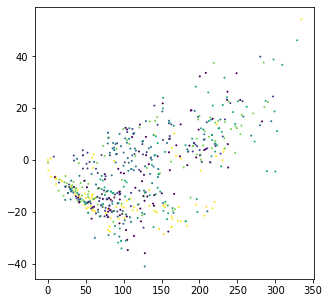

Found Cluster Subspaces:  [2, 98]
Subkmeans NMI:0.0521


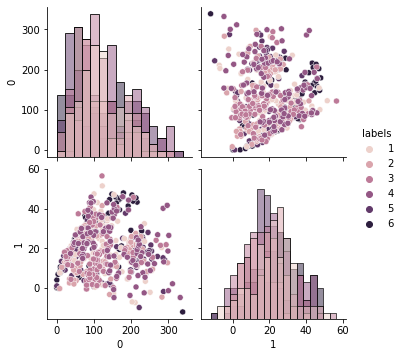

KPCA


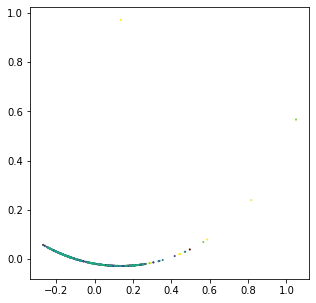

Found Cluster Subspaces:  [2, 98]
Subkmeans NMI:0.0432


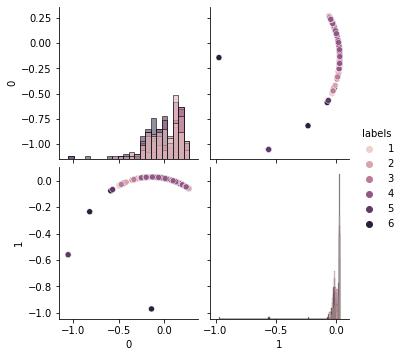

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Spectral  NMI:0.0168
##################################
##################################
Dataset  ENZYMES
Representation  shortestpath
##################################
(600, 600) (600, 6575)
n_clusters:  6
TSVD


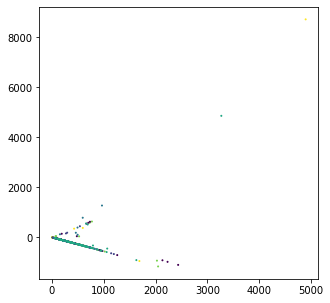

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0326


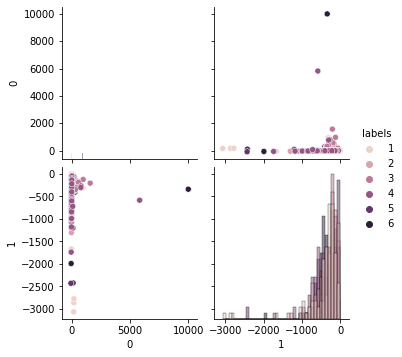

KPCA


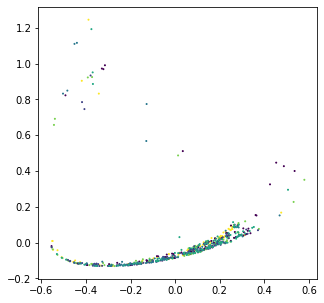

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0404


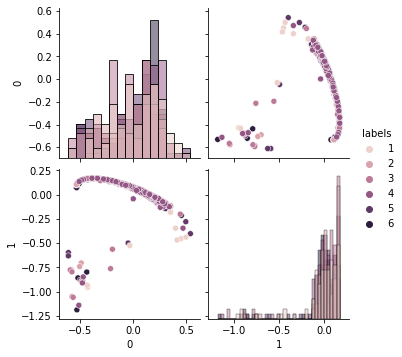

Spectral  NMI:0.0327
##################################


In [31]:
dataset = "ENZYMES"
representations = ["graphlet", "shortestpath"]
classes = dp.get_dataset(dataset)
nmis_kpca[dataset] = []
nmis_tsvd[dataset] = []
nmis_spec[dataset] = []

for representation in representations:
    # 0 taking just the nodelabels themselves into account; 
    # 1 considers nearest-neighbours, 2 one layer deeper and so on
    # play with this parameter to create a new kernel!
    print("##################################")
    print("Dataset ", dataset)
    print("Representation ", representation)
    print("##################################")

    #Gram Matrix for the Weisfeiler-Lehman subtree kernel
    gram = load_csv(os.path.join(base_path,f"{dataset}_gram_matrix_{representation}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    #Sparse Vectors for the Weisfeiler-Lehmann subtree kernel
    vec = load_sparse(os.path.join(base_path,f"{dataset}_vectors_{representation}.npz"))
    print(gram.shape, vec.shape)

    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)

    k = len(set(classes.tolist()))
    print("n_clusters: ", k)
    d = {0:"TSVD",1:"KPCA"}
    n_d = {0:nmis_tsvd, 1:nmis_kpca}
    for i,rep_i in enumerate([reduced_tsvd, reduced_kpca]):
        print(d[i])

        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(rep_i[:,0], rep_i[:,1], c=classes, s=1)
        plt.show();

        # Apply Subkmeans
        nrkm = NrKmeans(n_clusters=[k,1])#, allow_larger_noise_space=False)
        nrkm.fit(rep_i, best_of_n_rounds=10, verbose=False)
        print("Found Cluster Subspaces: ", nrkm.m)
        subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
        print(f"Subkmeans NMI:{subkm_nmi:.4f}")    
        n_d[i][dataset].append(subkm_nmi)
        # Plot rotated space
        V = nrkm.V
        rotated = np.dot(rep_i,V)
        reduced_df = pd.DataFrame(rotated[:,0:2])
        reduced_df["labels"] = classes#nrkm.labels[0]
        sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
        plt.show();

    # Apply Spectral Clustering
    spec = SpectralClustering(n_clusters=k, affinity="precomputed")
    spec.fit(gram)
    spec_nmi = normalized_mutual_info_score(spec.labels_,classes)
    nmis_spec[dataset].append(spec_nmi)
    print(f"Spectral  NMI:{spec_nmi:.4f}")   

    print("##################################")

## Visualize and Interpret your results

Here we use the IMDB-BINARY data set, but it works the same for all other data sets

In [32]:
def visualize(G, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, seed=42),
                     with_labels=True,
                     node_color=color,
                     cmap="Set2")
    plt.show();

In [33]:
base_path = os.path.join("kernels", "without_labels")
ds_name = "ENZYMES"
classes = dp.get_dataset(ds_name)
G = tud_to_networkx(ds_name)
print(f"Number of graphs in data set is {len(G)}")
print(f"Number of classes {len(set(classes.tolist()))}")

Number of graphs in data set is 600
Number of classes 6


## Let's start by plotting a single graph of our data set

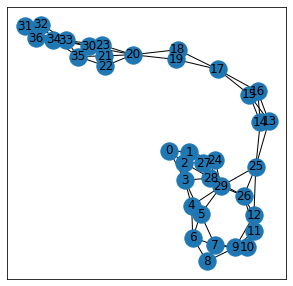

In [18]:
# We just use the first in the list
idx = 0
visualize(G[idx])

## Plot the vector representation with KernelPCA

Just by this plot we can already see that there are outliers that might disturb our K-Means assumptions

In [40]:
representations = ["wl5", "graphlet", "shortestpath"]

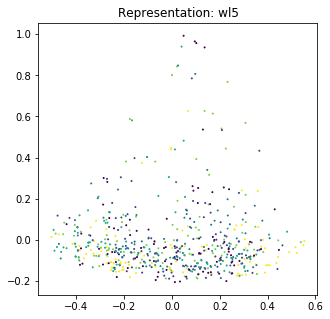

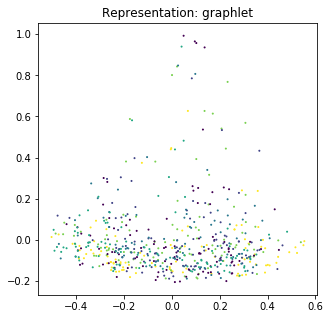

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


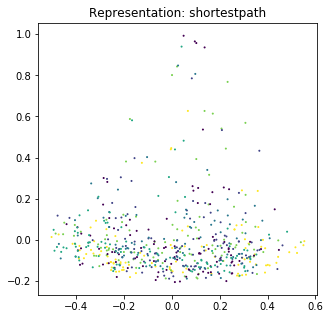

In [41]:
for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_kpca[:,0], reduced_kpca[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

## Plot the vector representation with TruncatedSVD

Also here we can see some outlier points. 

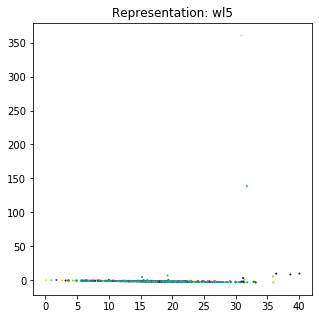

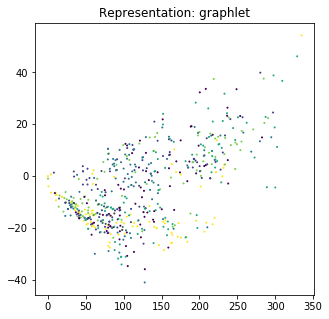

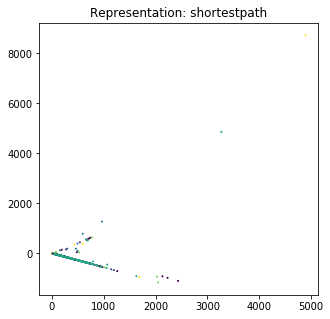

In [39]:
#Gram Matrix for the Weisfeiler-Lehman subtree kernel
for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_tsvd[:,0], reduced_tsvd[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

## Apply Subkmeans with KernelPCA

As expected from the results above the Subkmeans model might not be well suited to find the ground truth clusters of the IMDB-BINARY data set.

In [23]:
k = len(set(classes.tolist()))
print("n_clusters: ", k)
nrkm = NrKmeans(n_clusters=[k,1], allow_larger_noise_space=True)
nrkm.fit(reduced_kpca, best_of_n_rounds=10, verbose=False)
print("Found Cluster Subspaces: ", nrkm.m)
subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
print(f"Subkmeans NMI:{subkm_nmi:.4f}")    

n_clusters:  6
Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0314


**Plot the rotated space**

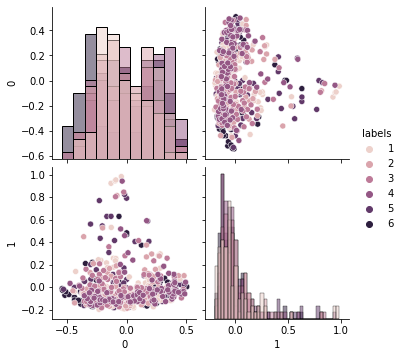

In [24]:
V = nrkm.V
rotated = np.dot(reduced_kpca,V)
reduced_df = pd.DataFrame(rotated[:,0:2])
reduced_df["labels"] = classes
sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
plt.show();

## Cluster Analysis with KMeans

But, we can still use clustering to further explore the data set.
Here we use a simple technique for interpreting our cluster results for the IMBD-BINARY data set, but it works the same for the other data sets. 
We investigate the nearest neighbours of each centroid in each cluster. 

In [25]:
# only keep the first 10 components to speed up computation
reduced_kpca_10 = reduced_kpca[:, 0:10]

### First we determine the number of k clusters using a scree plot

In [26]:
costs = []
kmeans_runs = []
k_list = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40]
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_kpca_10)
    costs.append(kmeans.inertia_)
    kmeans_runs.append(deepcopy(kmeans))

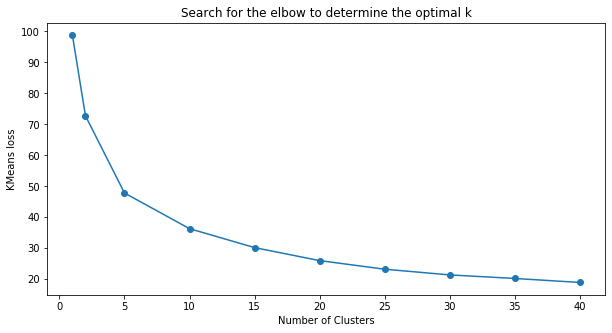

In [27]:
def scree_plot(k_list, costs):
    plt.figure(figsize=(10,5))
    plt.plot(k_list, costs, marker="o")
    plt.xlabel('Number of Clusters')
    plt.ylabel('KMeans loss')
    plt.title('Search for the elbow to determine the optimal k')
    plt.show();
scree_plot(k_list, costs)

Choose k=10

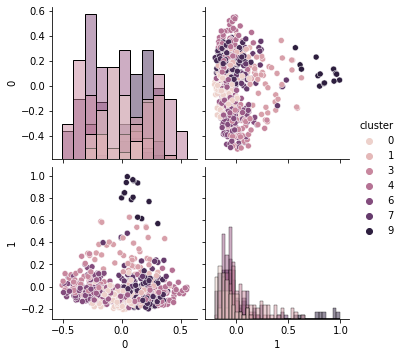

In [28]:
selected_idx = 3
kmeans = kmeans_runs[selected_idx]
df = pd.DataFrame(reduced_kpca_10[:,0:2])
df["cluster"] = kmeans.labels_
sns.pairplot(df, hue="cluster", diag_kind="hist")
plt.show();

## Plot the first n nearest neighbours of each centroid

In [29]:
from sklearn.metrics import pairwise_distances
# select first 2 nearest neighbours in for each cluster
nr_nearest = 2
nearest_indices = []
for cluster_i in set(kmeans.labels_):
    mask = (kmeans.labels_ == cluster_i)
    selection = reduced_kpca_10[mask]
    print(f"number of data points in cluster {cluster_i}: {selection.shape[0]}")
    center_i = kmeans.cluster_centers_[cluster_i].reshape(1,-1)
    distances_i = pairwise_distances(center_i, reduced_kpca_10)
    nearest_indices.append(np.argsort(distances_i, )[0][0:nr_nearest])
    print(f"Nearest data points in cluster {cluster_i}: {nearest_indices[-1]}")


number of data points in cluster 0: 70
Nearest data points in cluster 0: [449 413]
number of data points in cluster 1: 48
Nearest data points in cluster 1: [110 161]
number of data points in cluster 2: 39
Nearest data points in cluster 2: [253 429]
number of data points in cluster 3: 63
Nearest data points in cluster 3: [580 524]
number of data points in cluster 4: 73
Nearest data points in cluster 4: [552 365]
number of data points in cluster 5: 98
Nearest data points in cluster 5: [261  40]
number of data points in cluster 6: 82
Nearest data points in cluster 6: [585 176]
number of data points in cluster 7: 30
Nearest data points in cluster 7: [158 151]
number of data points in cluster 8: 83
Nearest data points in cluster 8: [545 387]
number of data points in cluster 9: 14
Nearest data points in cluster 9: [456 500]


Cluster 0, Indices [449 413]


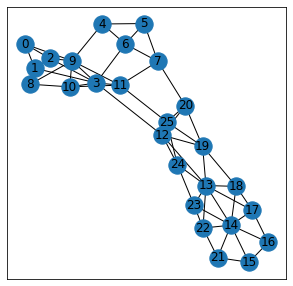

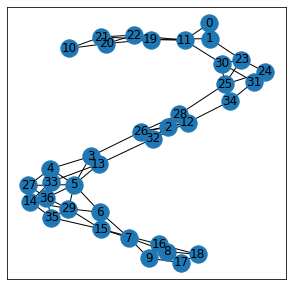

Cluster 1, Indices [110 161]


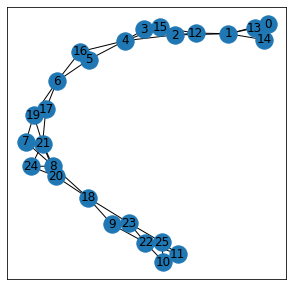

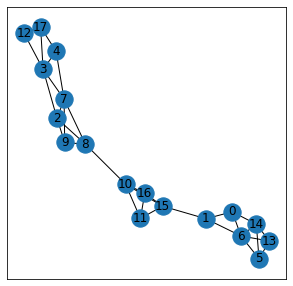

Cluster 2, Indices [253 429]


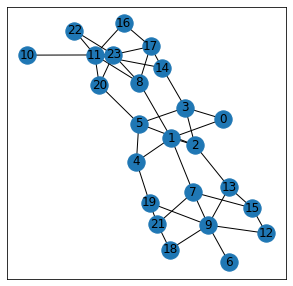

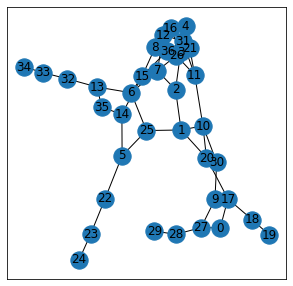

Cluster 3, Indices [580 524]


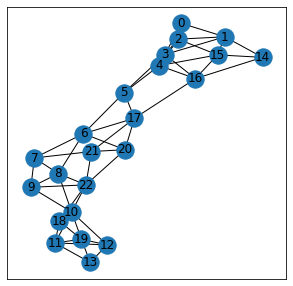

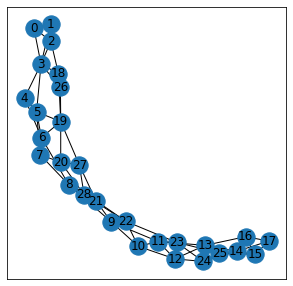

Cluster 4, Indices [552 365]


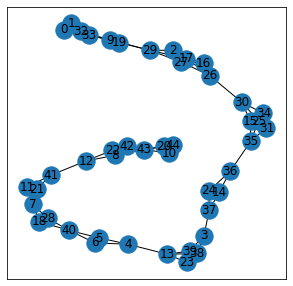

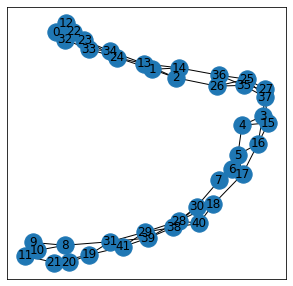

Cluster 5, Indices [261  40]


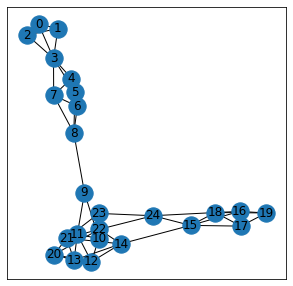

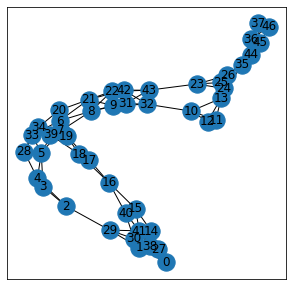

Cluster 6, Indices [585 176]


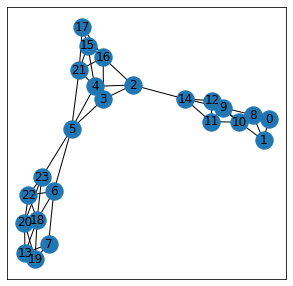

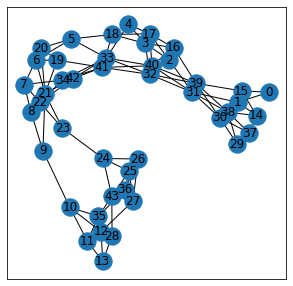

Cluster 7, Indices [158 151]


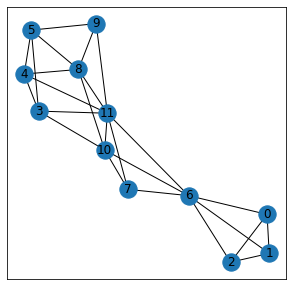

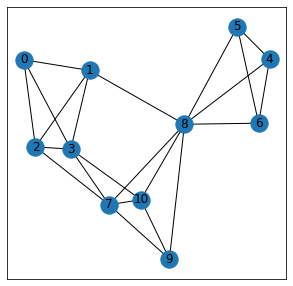

Cluster 8, Indices [545 387]


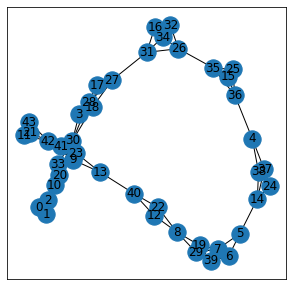

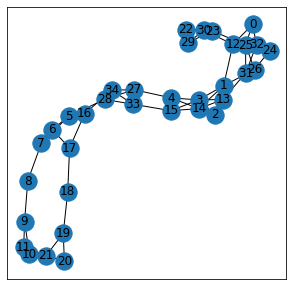

Cluster 9, Indices [456 500]


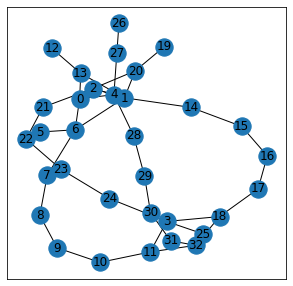

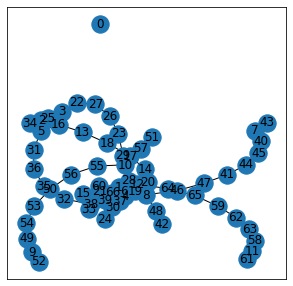

In [30]:
for i, indices in enumerate(nearest_indices):
    print(f"Cluster {i}, Indices {indices}")
    G_selected = select_from_list(G, indices)
    for g_i in G_selected:
        visualize(g_i)